In [1]:
import os
import sys

import numpy as np
import pandas as pd
from datetime import datetime
import pdb
import xarray as xr
import matplotlib.pyplot as plt
import puv

import solo

sys.path.append(r'c:\checkouts\python\TUD-COASTAL\python')

In [2]:
dataFolder="ps_data/tailored_with_c/"

ds1 = xr.open_dataset(dataFolder+"ps1.nc")
ds2 = xr.open_dataset(dataFolder+"ps2.nc")
ds3 = xr.open_dataset(dataFolder+"ps3.nc")
ds4 = xr.open_dataset(dataFolder+"ps4.nc")
ds5 = xr.open_dataset(dataFolder+"ps5.nc")
ds6 = xr.open_dataset(dataFolder+"ps6.nc")

display(ds1)

<xarray.Dataset>
Dimensions:         (t: 894, f: 128)
Coordinates:
  * t               (t) datetime64[ns] 2023-09-23T10:09:32 ... 2023-09-29T14:...
  * f               (f) float64 0.0 0.03125 0.0625 0.09375 ... 3.906 3.938 3.969
Data variables: (12/26)
    zi              (t) float64 ...
    zb              (t) float64 ...
    sf              float64 ...
    name            object ...
    h               (t) float64 ...
    vy              (t, f) float64 ...
    ...              ...
    vel_As          (t) float64 ...
    vel_sig         (t) float64 ...
    u_k             (t) float64 ...
    u_Ur            (t) float64 ...
    epsilon         (t) float64 ...
    cb_10           (t) float64 ...
Attributes: (12/16)
    Conventions:               CF-1.6
    name:                      ps1
    instrument:                ps1
    instrument type:           Ruskin RBR Solo
    instrument serial number:  202438
    epsg:                      28992
    ...                        ...
    summary:                   Hydraulic fieldwork pressure data, with pressu...
    contact person:            Marlies van der Lugt
    emailadres:                m.a.vanderlugt@tudelft.nl
    construction datetime:     10-Nov-2023 (15:13:47)
    version:                   v1
    version comments:          constructed with xarray

In [3]:
Urp1 = ds1.p_Ur.values
Uru1 = ds1.u_Ur.values
Sp1 = ds1.p_Sk.values
Ap1 = ds1.p_As.values
Su1 = ds1.vel_Sk.values
Au1 = ds1.vel_As.values

Urp2 = ds2.p_Ur.values
Uru2 = ds2.u_Ur.values
Sp2 = ds2.p_Sk.values
Ap2 = ds2.p_As.values
Su2 = ds2.vel_Sk.values
Au2 = ds2.vel_As.values

Urp3 = ds3.p_Ur.values
Uru3 = ds3.u_Ur.values
Sp3 = ds3.p_Sk.values
Ap3 = ds3.p_As.values
Su3 = ds3.vel_Sk.values
Au3 = ds3.vel_As.values

Urp4 = ds4.p_Ur.values
Uru4 = ds4.u_Ur.values
Sp4 = ds4.p_Sk.values
Ap4 = ds4.p_As.values
Su4 = ds4.vel_Sk.values
Au4 = ds4.vel_As.values

Urp5 = ds5.p_Ur.values
Uru5 = ds5.u_Ur.values
Sp5 = ds5.p_Sk.values
Ap5 = ds5.p_As.values
Su5 = ds5.vel_Sk.values
Au5 = ds5.vel_As.values

Urp6 = ds6.p_Ur.values
Uru6 = ds6.u_Ur.values
Sp6 = ds6.p_Sk.values
Ap6 = ds6.p_As.values
Su6 = ds6.vel_Sk.values
Au6 = ds6.vel_As.values

### Parameterization of Ruessink et al (2012)
https://www.sciencedirect.com/science/article/pii/S0378383912000488?casa_token=Jv9cQA7FCsYAAAAA:BfcfVqCfwtwplesFjMLiNZ9YwYgo_J8gF7q0VUw2KSf9TyVN8M3DOy49m6EnI91nY275TdT5Tls

In [4]:
Ur = np.arange(0.005, 1000, 0.001)

p1 = 0
p2 = 0.857  # +- -0.016
p3 = -0.471 # +- 0.025
p4 = 0.297  # +- 0.021

p5 = 0.815  # +- 0.055
p6 = 0.672  # +- 0.073

B = p1 + (p2 - p1)/(1 + np.exp(((p3 - np.log(Ur))/p4)))
psi = -90 + 90 * np.tanh(p5 / Ur**p6)

Sk_bf = B * np.cos(psi / 360 * 2 * np.pi)
As_bf = B * np.sin(psi / 360 * 2 * np.pi)

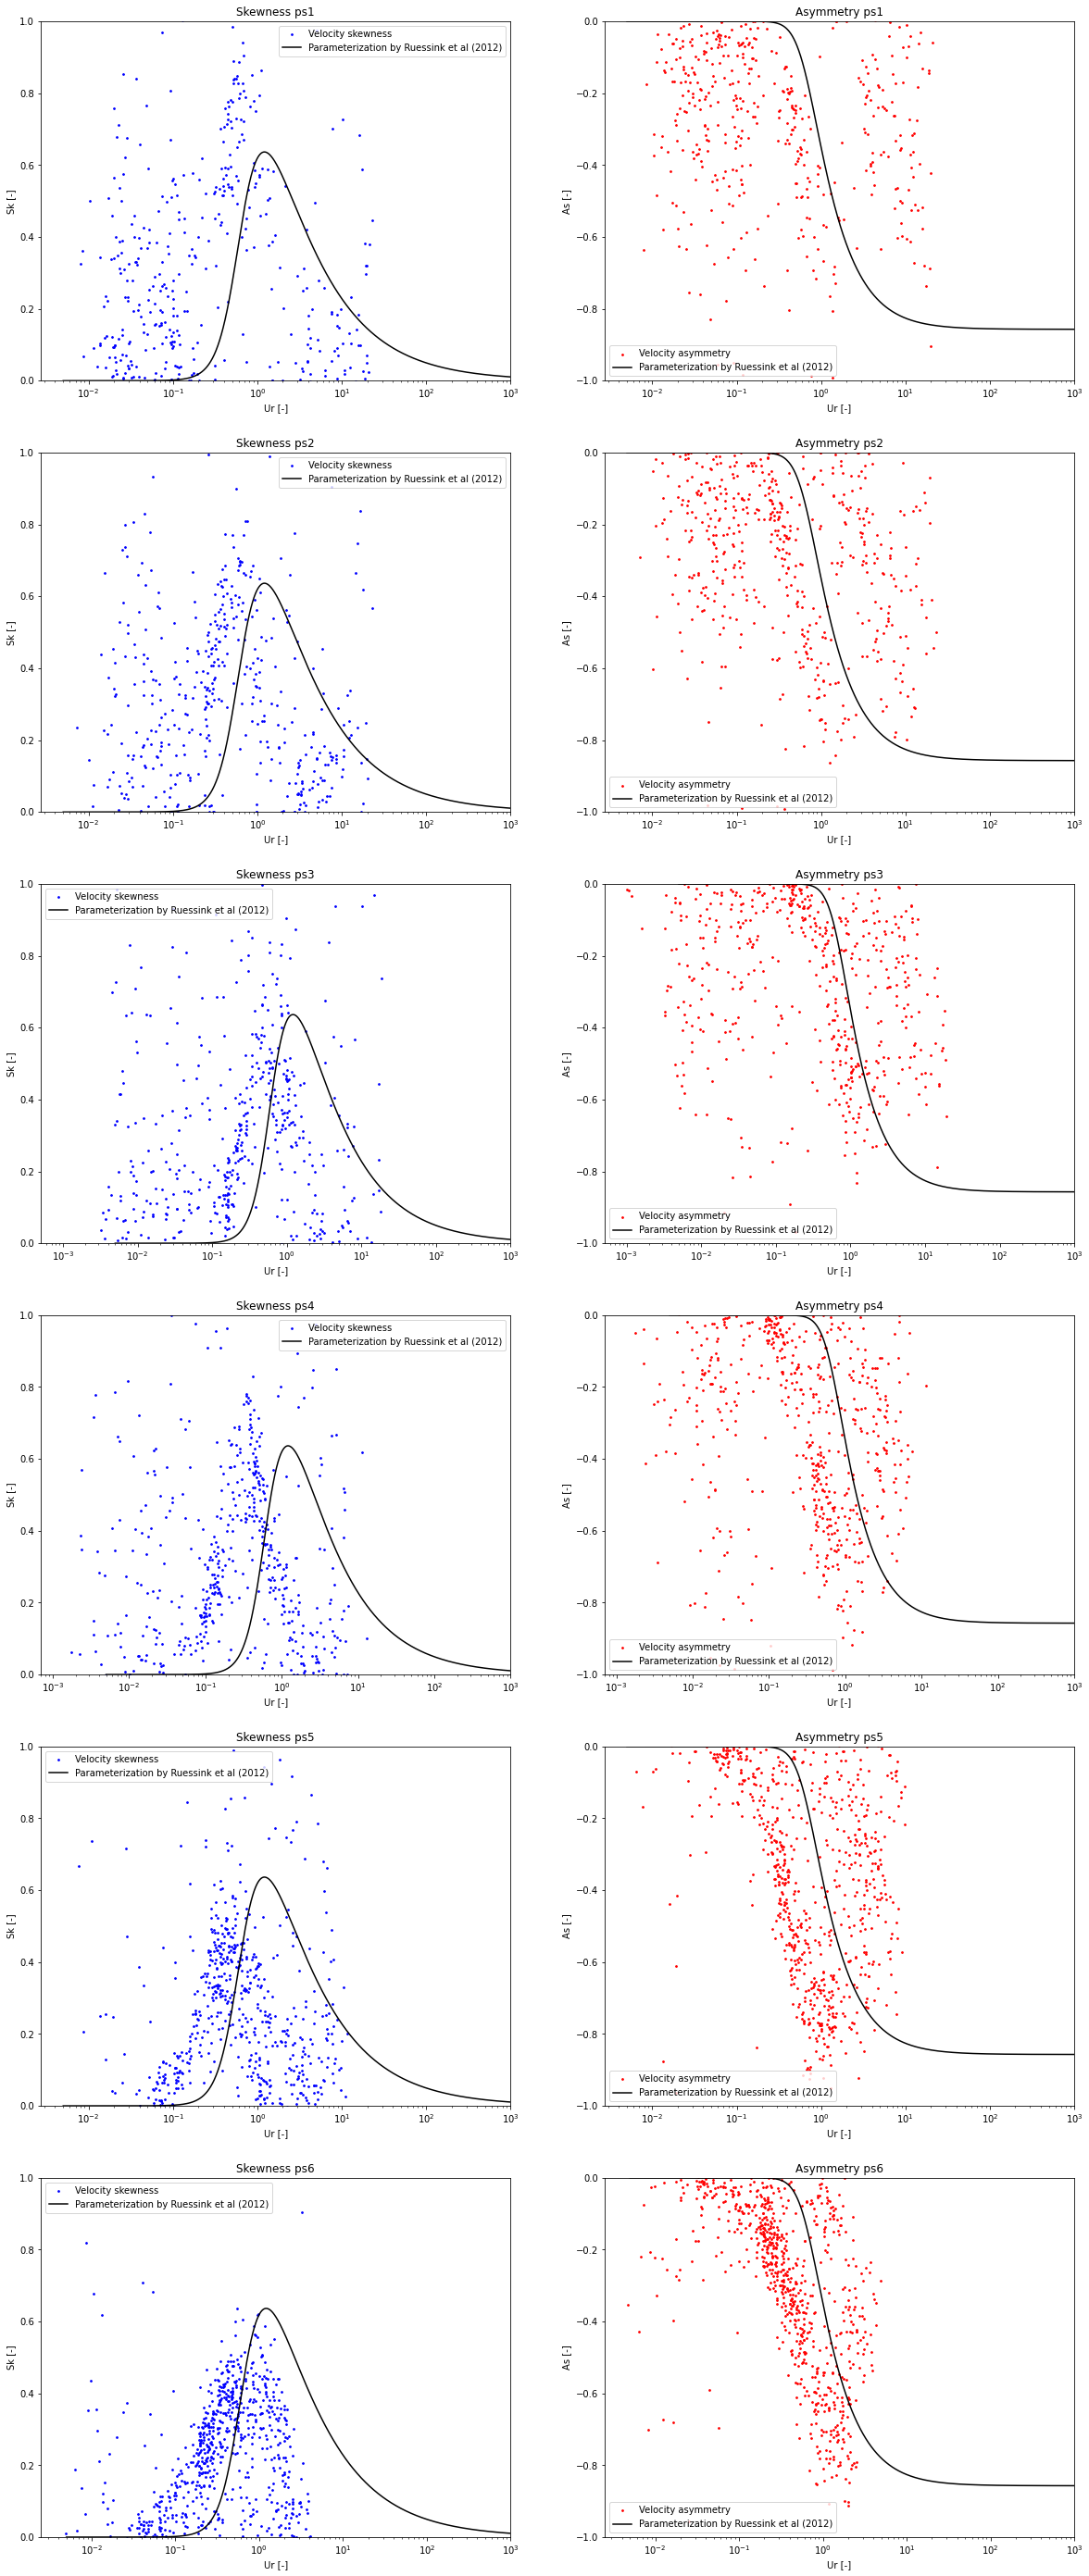

In [5]:
# bins = np.logspace(-2, 1, 51)

# def get_Ur_from_bins(bins):
#     Ur = np.zeros(len(bins)-1)
    
#     for i in range(len(Ur)):
#         Ur[i] = np.mean([bins[i], bins[i+1]])
    
#     return Ur

# Ur_bins = get_Ur_from_bins(bins)


fig, ax = plt.subplots(6, 2, figsize=(20, 50))

r = 0

for ds in [ds1, ds2, ds3, ds4, ds5, ds6]:
    
    c = 0
    
#     digitized = np.digitize(ds.Ur, bins)
#     bin_means_Su = [ds.vel_Sk[digitized == i].mean() for i in range(1, len(bins))]
#     bin_stds_Su = [ds.vel_Sk[digitized == i].std() for i in range(1, len(bins))]
#     bin_means_Au = [ds.vel_As[digitized == i].mean() for i in range(1, len(bins))]
#     bin_stds_Au = [ds.vel_As[digitized == i].std() for i in range(1, len(bins))]
    
    ax[r, c].set_title(f'Skewness {ds.instrument}')
#     ax[r, c].scatter(ds.Ur.values, ds.p_Sk.values, marker='o', color='b', s=3, label=f'Pressure skewness')
    ax[r, c].scatter(ds.u_Ur.values, ds.vel_Sk.values, marker='o', color='b', s=3, label=f'Velocity skewness')
#     ax[r, c].scatter(Ur_bins, bin_means_Su, color='b', label='binned mean')
#     ax[r, c].errorbar(Ur_bins, bin_means_Su, yerr=bin_stds_Su, fmt='none', ecolor='b')
    ax[r, c].plot(Ur, Sk_bf, label='Parameterization by Ruessink et al (2012)', color='k')
    ax[r, c].set_xscale('log')
    ax[r, c].set_ylim(0, 1)
    ax[r, c].set_xlim(right=1000)
    ax[r, c].set_xlabel('Ur [-]')
    ax[r, c].set_ylabel('Sk [-]')
    ax[r, c].legend()

    c = 1

    ax[r, c].set_title(f'Asymmetry {ds.instrument}')
#     ax[r, c].scatter(ds.Ur.values, ds.p_As.values, marker='o', color='b', s=3, label=f'Pressure asymmetry')
    ax[r, c].scatter(ds.u_Ur.values, ds.vel_As.values, marker='o', color='r', s=3, label=f'Velocity asymmetry')
    ax[r, c].plot(Ur, As_bf, label='Parameterization by Ruessink et al (2012)', color='k')
    ax[r, c].set_xscale('log')
    ax[r, c].set_ylim(-1, 0)
    ax[r, c].set_xlim(right=1000) 
    ax[r, c].set_xlabel('Ur [-]')
    ax[r, c].set_ylabel('As [-]')
    ax[r, c].legend(loc='lower left')
    
    r += 1
    
    
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
plt.savefig('figures/comparison_Ruessink_seperate.png', bbox_inches='tight', facecolor='white', transparent=False)

### Start with velocity skewness/asymmetry

In [6]:
all_Su = np.concatenate((
    ds1.vel_Sk.values,
    ds2.vel_Sk.values,
    ds3.vel_Sk.values,
    ds4.vel_Sk.values,
    ds5.vel_Sk.values,
    ds6.vel_Sk.values))

all_Au = np.concatenate((
    ds1.vel_As.values,
    ds2.vel_As.values,
    ds3.vel_As.values,
    ds4.vel_As.values,
    ds5.vel_As.values,
    ds6.vel_As.values))

all_Ur = np.concatenate((
    ds1.u_Ur.values,
    ds2.u_Ur.values,
    ds3.u_Ur.values,
    ds4.u_Ur.values,
    ds5.u_Ur.values,
    ds6.u_Ur.values,))

# all_Su = ds6.vel_Sk.values
# all_Au = ds6.vel_As.values
# all_Ur = ds6.Ur.values

In [7]:
bins = np.logspace(-2, 1, 51)

def get_Ur_from_bins(bins):
    Ur = np.zeros(len(bins)-1)
    
    for i in range(len(Ur)):
        Ur[i] = np.mean([bins[i], bins[i+1]])
    
    return Ur

Ur_bins = get_Ur_from_bins(bins)

digitized = np.digitize(all_Ur, bins)
bin_means_Su = [all_Su[digitized == i].mean() for i in range(1, len(bins))]
bin_stds_Su = [all_Su[digitized == i].std() for i in range(1, len(bins))]
bin_means_Au = [all_Au[digitized == i].mean() for i in range(1, len(bins))]
bin_stds_Au = [all_Au[digitized == i].std() for i in range(1, len(bins))]

# np.savetxt('bin_means_Su (+0.1).txt', bin_means_Su)
# np.savetxt('bin_means_Au (+0.1).txt', bin_means_Au)

# bin_means_Su_hh = np.loadtxt('bin_means_Su (1.1h)')
# bin_means_Su_lh = np.loadtxt('bin_means_Su (0.9h)')

# bin_means_Au_hh = np.loadtxt('bin_means_Au (1.1h)')
# bin_means_Au_lh = np.loadtxt('bin_means_Au (0.9h)')

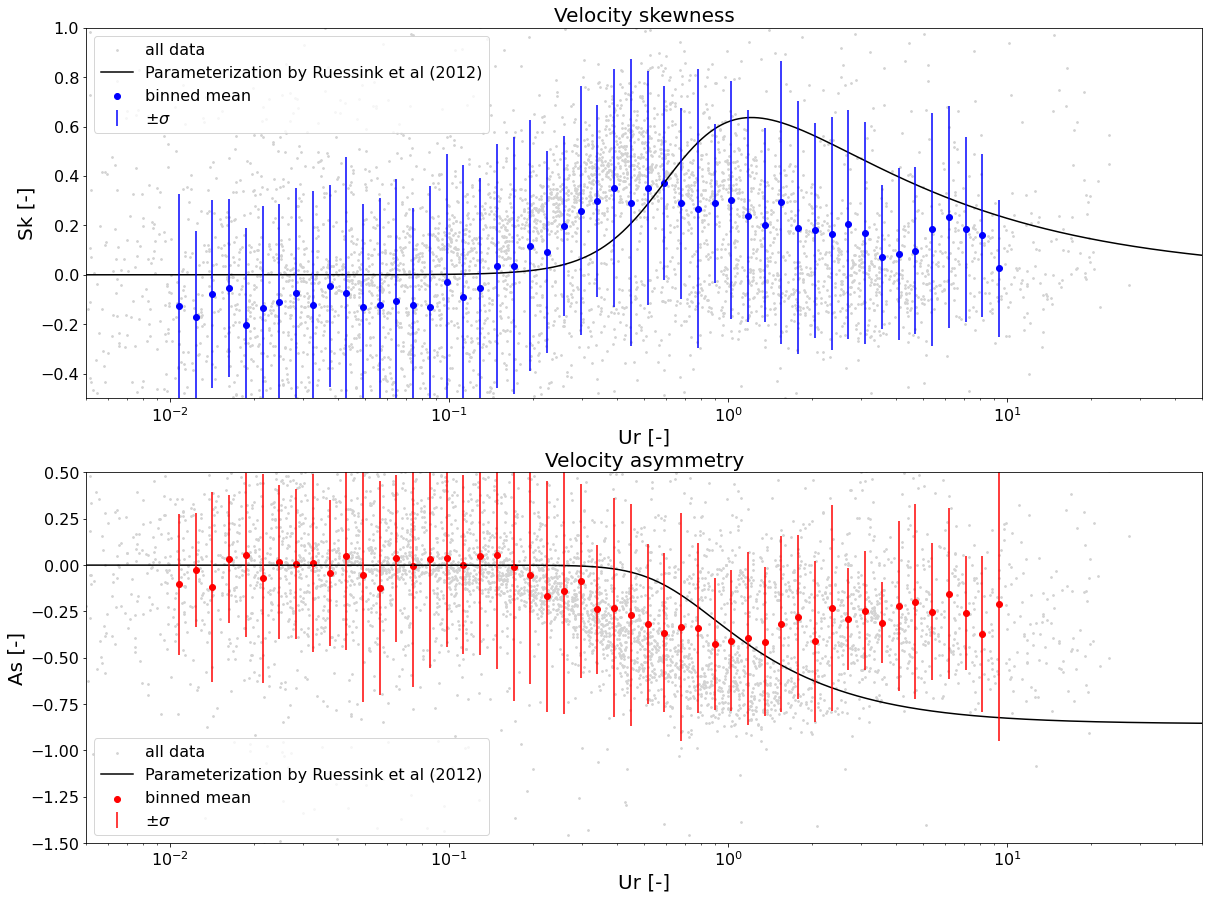

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

axs[0].set_title('Velocity skewness')
axs[0].scatter(all_Ur, all_Su, s=3, color='lightgrey', label='all data')
axs[0].set_ylim((-0.5, 1))
axs[0].plot(Ur, Sk_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[0].set_xscale('log')
axs[0].set_xlim(left=0.005, right=50)
axs[0].scatter(Ur_bins, bin_means_Su, color='b', label='binned mean')
axs[0].errorbar(Ur_bins, bin_means_Su, yerr=bin_stds_Su, fmt='none', ecolor='b', label='$\pm$$\sigma$')
axs[0].set_xlabel('Ur [-]')
axs[0].set_ylabel('Sk [-]')
axs[0].legend(loc='upper left')

axs[1].set_title('Velocity asymmetry')
axs[1].scatter(all_Ur, all_Au, s=3, color='lightgrey', label='all data')
axs[1].set_ylim((-1.5, 0.5))
axs[1].plot(Ur, As_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[1].set_xscale('log')
axs[1].set_xlim(left=0.005, right=50)
axs[1].scatter(Ur_bins, bin_means_Au, color='r', label='binned mean')
axs[1].errorbar(Ur_bins, bin_means_Au, yerr=bin_stds_Au, fmt='none', ecolor='r', label='$\pm$$\sigma$')
axs[1].set_xlabel('Ur [-]')
axs[1].set_ylabel('As [-]')
axs[1].legend(loc='lower left')

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/comparison_Ruessink.png', bbox_inches='tight', facecolor='white', transparent=False)

In [9]:
bin_means_Su_hh = np.loadtxt('bin_means_Su (1.1h)')
bin_means_Su_lh = np.loadtxt('bin_means_Su (0.9h)')

bin_means_Au_hh = np.loadtxt('bin_means_Au (1.1h)')
bin_means_Au_lh = np.loadtxt('bin_means_Au (0.9h)')

fig, axs = plt.subplots(2, 1, figsize=(20, 15))

axs[0].set_title('Velocity skewness')
axs[0].scatter(all_Ur, all_Su, s=3, color='lightgrey', label='all data')
axs[0].set_ylim((-0.5, 1))
axs[0].plot(Ur, Sk_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[0].plot(Ur_bins, bin_means_Su_hh, label='1.1h', color='C1')
axs[0].plot(Ur_bins, bin_means_Su_lh, label='0.9h', color='C2')
axs[0].set_xscale('log')
axs[0].set_xlim(left=0.005, right=50)
axs[0].scatter(Ur_bins, bin_means_Su, color='b', label='binned mean')
axs[0].errorbar(Ur_bins, bin_means_Su, yerr=bin_stds_Su, fmt='none', ecolor='b', label='$\pm$$\sigma$')
axs[0].set_xlabel('Ur [-]')
axs[0].set_ylabel('Sk [-]')
axs[0].legend(loc='upper left')

axs[1].set_title('Velocity asymmetry')
axs[1].scatter(all_Ur, all_Au, s=3, color='lightgrey', label='all data')
axs[1].set_ylim((-1.5, 0.5))
axs[1].plot(Ur, As_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[1].plot(Ur_bins, bin_means_Au_hh, label='1.1h', color='C1')
axs[1].plot(Ur_bins, bin_means_Au_lh, label='0.9h', color='C2')
axs[1].set_xscale('log')
axs[1].set_xlim(left=0.005, right=50)
axs[1].scatter(Ur_bins, bin_means_Au, color='r', label='binned mean')
axs[1].errorbar(Ur_bins, bin_means_Au, yerr=bin_stds_Au, fmt='none', ecolor='r', label='$\pm$$\sigma$')
axs[1].set_xlabel('Ur [-]')
axs[1].set_ylabel('As [-]')
axs[1].legend(loc='lower left')

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/comparison_Ruessink_with_error.png', bbox_inches='tight', facecolor='white', transparent=False)

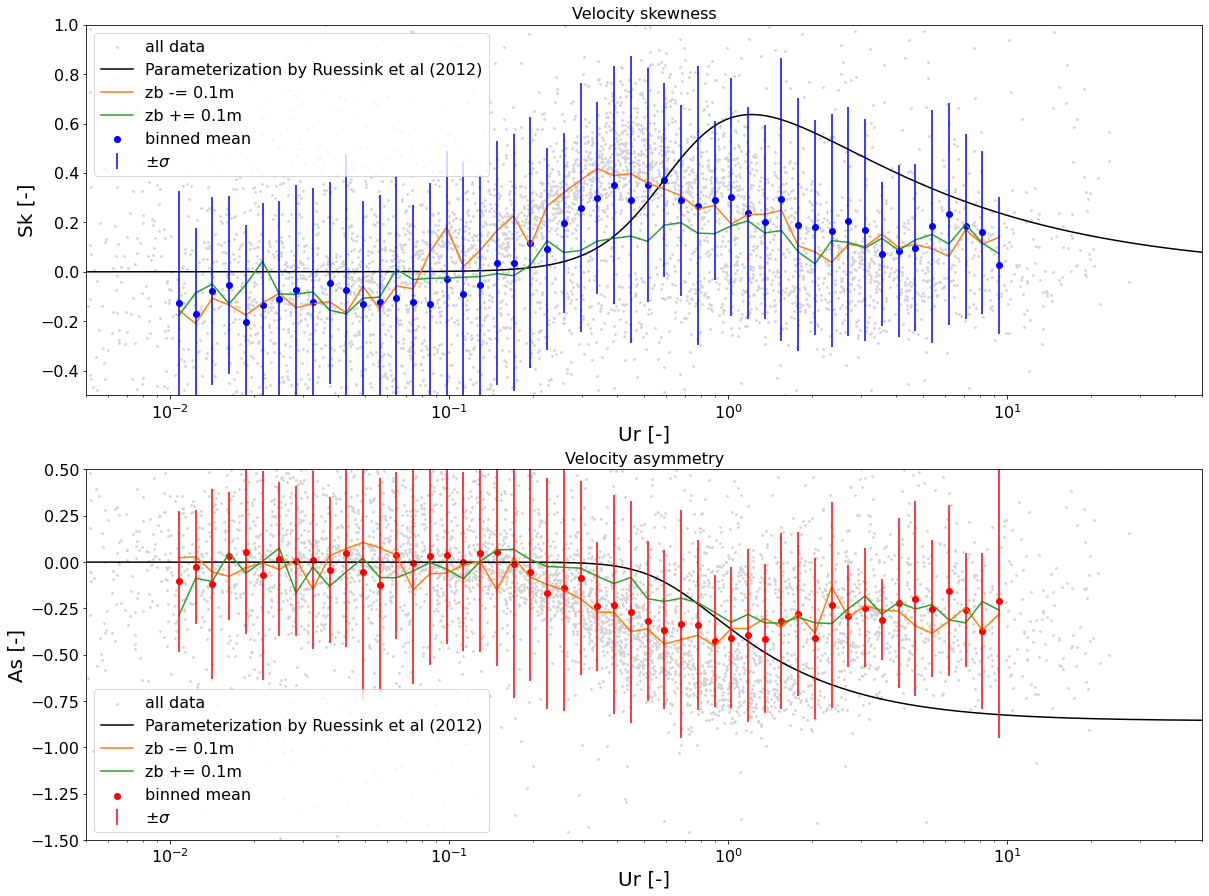

In [10]:
bin_means_Su_hh = np.loadtxt('bin_means_Su (-0.1).txt')
bin_means_Su_lh = np.loadtxt('bin_means_Su (+0.1).txt')

bin_means_Au_hh = np.loadtxt('bin_means_Au (-0.1).txt')
bin_means_Au_lh = np.loadtxt('bin_means_Au (+0.1).txt')

fig, axs = plt.subplots(2, 1, figsize=(20, 15))

axs[0].set_title('Velocity skewness')
axs[0].scatter(all_Ur, all_Su, s=3, color='lightgrey', label='all data')
axs[0].set_ylim((-0.5, 1))
axs[0].plot(Ur, Sk_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[0].plot(Ur_bins, bin_means_Su_hh, label='zb -= 0.1m', color='C1')
axs[0].plot(Ur_bins, bin_means_Su_lh, label='zb += 0.1m', color='C2')
axs[0].set_xscale('log')
axs[0].set_xlim(left=0.005, right=50)
axs[0].scatter(Ur_bins, bin_means_Su, color='b', label='binned mean')
axs[0].errorbar(Ur_bins, bin_means_Su, yerr=bin_stds_Su, fmt='none', ecolor='b', label='$\pm$$\sigma$')
axs[0].set_xlabel('Ur [-]')
axs[0].set_ylabel('Sk [-]')
axs[0].legend(loc='upper left')

axs[1].set_title('Velocity asymmetry')
axs[1].scatter(all_Ur, all_Au, s=3, color='lightgrey', label='all data')
axs[1].set_ylim((-1.5, 0.5))
axs[1].plot(Ur, As_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[1].plot(Ur_bins, bin_means_Au_hh, label='zb -= 0.1m', color='C1')
axs[1].plot(Ur_bins, bin_means_Au_lh, label='zb += 0.1m', color='C2')
axs[1].set_xscale('log')
axs[1].set_xlim(left=0.005, right=50)
axs[1].scatter(Ur_bins, bin_means_Au, color='r', label='binned mean')
axs[1].errorbar(Ur_bins, bin_means_Au, yerr=bin_stds_Au, fmt='none', ecolor='r', label='$\pm$$\sigma$')
axs[1].set_xlabel('Ur [-]')
axs[1].set_ylabel('As [-]')
axs[1].legend(loc='lower left')

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/comparison_Ruessink_with_error_abs.png', bbox_inches='tight', facecolor='white', transparent=False)

### Pressure skewness/asymmetry

In [11]:
all_Su = np.concatenate((
    ds1.p_Sk.values,
    ds2.p_Sk.values,
    ds3.p_Sk.values,
    ds4.p_Sk.values,
    ds5.p_Sk.values,
    ds6.p_Sk.values))

all_Au = np.concatenate((
    ds1.p_As.values,
    ds2.p_As.values,
    ds3.p_As.values,
    ds4.p_As.values,
    ds5.p_As.values,
    ds6.p_As.values))

all_Ur = np.concatenate((
    ds1.p_Ur.values,
    ds2.p_Ur.values,
    ds3.p_Ur.values,
    ds4.p_Ur.values,
    ds5.p_Ur.values,
    ds6.p_Ur.values,))

# all_Su = ds6.vel_Sk.values
# all_Au = ds6.vel_As.values
# all_Ur = ds6.Ur.values

In [12]:
bins = np.logspace(-2, 1, 51)

def get_Ur_from_bins(bins):
    Ur = np.zeros(len(bins)-1)
    
    for i in range(len(Ur)):
        Ur[i] = np.mean([bins[i], bins[i+1]])
    
    return Ur

Ur_bins = get_Ur_from_bins(bins)

digitized = np.digitize(all_Ur, bins)
bin_means_Su = [all_Su[digitized == i].mean() for i in range(1, len(bins))]
bin_stds_Su = [all_Su[digitized == i].std() for i in range(1, len(bins))]
bin_means_Au = [all_Au[digitized == i].mean() for i in range(1, len(bins))]
bin_stds_Au = [all_Au[digitized == i].std() for i in range(1, len(bins))]

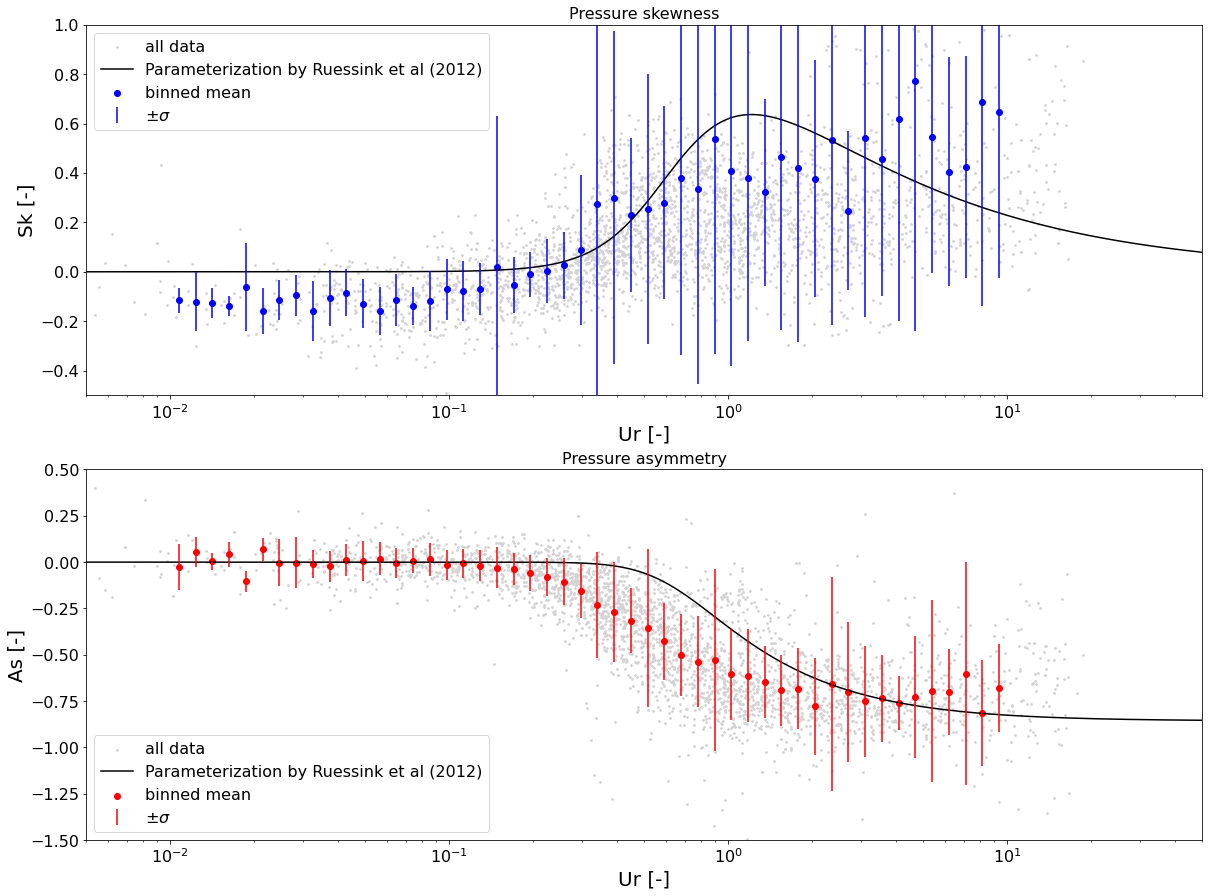

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

axs[0].set_title('Pressure skewness')
axs[0].scatter(all_Ur, all_Su, s=3, color='lightgrey', label='all data')
axs[0].set_ylim((-0.5, 1))
axs[0].plot(Ur, Sk_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[0].set_xscale('log')
axs[0].set_xlim(left=0.005, right=50)
axs[0].scatter(Ur_bins, bin_means_Su, color='b', label='binned mean')
axs[0].errorbar(Ur_bins, bin_means_Su, yerr=bin_stds_Su, fmt='none', ecolor='b', label='$\pm$$\sigma$')
axs[0].set_xlabel('Ur [-]')
axs[0].set_ylabel('Sk [-]')
axs[0].legend(loc='upper left')

axs[1].set_title('Pressure asymmetry')
axs[1].scatter(all_Ur, all_Au, s=3, color='lightgrey', label='all data')
axs[1].set_ylim((-1.5, 0.5))
axs[1].plot(Ur, As_bf, color='k', label='Parameterization by Ruessink et al (2012)')
axs[1].set_xscale('log')
axs[1].set_xlim(left=0.005, right=50)
axs[1].scatter(Ur_bins, bin_means_Au, color='r', label='binned mean')
axs[1].errorbar(Ur_bins, bin_means_Au, yerr=bin_stds_Au, fmt='none', ecolor='r', label='$\pm$$\sigma$')
axs[1].set_xlabel('Ur [-]')
axs[1].set_ylabel('As [-]')
axs[1].legend(loc='lower left')

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/comparison_Ruessink_pressure.png', bbox_inches='tight', facecolor='white', transparent=False)